<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
d = pd.read_excel(path)

In [11]:
import nltk

comments = d['Comments']

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
d['Sentiment'] = comments.apply(lambda x: sia.polarity_scores(str(x))['compound'])

print(d[['Comments', 'Sentiment']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                           Comments  Sentiment
0        Satisfied with the service     0.4215
1     Needs improvement in delivery     0.4588
2                  Regular customer     0.0000
3                  Occasional buyer     0.0000
4                      High spender     0.0000
5                Average experience     0.0000
6           Prefers online shopping     0.0000
7                      New customer     0.0000
8                Loyal to the brand     0.4767
9              High conversion rate     0.0000
10                   Low engagement     0.2263
11   Satisfied with product quality     0.4215
12                 Frequent shopper     0.0000
13             Unhappy with returns    -0.4215
14                 Enjoys discounts     0.5106
15               Enjoys the product     0.5106
16           Needs more information     0.0000
17  Satisfied with customer service     0.4215
18                   Not interested    -0.3089
19                 Likes the design     0.4215


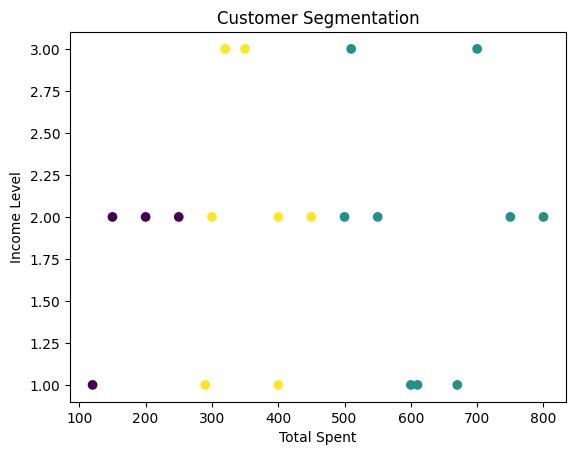

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = d[['Total Spent', 'Income Level']].copy()
features['Income Level'] = features['Income Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

kmeans = KMeans(n_clusters=3, random_state=42)
d['Segment'] = kmeans.fit_predict(features)

plt.scatter(features['Total Spent'], features['Income Level'], c=d['Segment'])
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Income Level')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = d[['Age', 'Discount Availed', 'Customer Tenure (Years)']]
y = d['Total Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [3.30596775 1.20981196 0.14938415]
Model Intercept: 273.4371944492052


In [15]:
import pymc as pm
import numpy as np

conversion_rates = d.groupby('Campaign')['Converted'].mean().values
trials = d.groupby('Campaign').size().values

with pm.Model() as model:
  prior = pm.Beta("prior", alpha=1, beta=1)
  likelihood = pm.Binomial("likelihood", n=trials, p=prior, observed=conversion_rates)
  trace = pm.sample(1000, return_inferencedata=False)

posterior_mean = trace['prior'].mean()
print(f"Posterior Mean Conversion Rate: {posterior_mean}")

Output()

Output()

Posterior Mean Conversion Rate: 0.05808026497145804


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg42m1_m2/m2ucfhv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg42m1_m2/698uyh4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80541', 'data', 'file=/tmp/tmpg42m1_m2/m2ucfhv6.json', 'init=/tmp/tmpg42m1_m2/698uyh4f.json', 'output', 'file=/tmp/tmpg42m1_m2/prophet_modell48afa5j/prophet_model-20241125144525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:25 - cmdstanpy - INFO - Chain [1] start processing
IN

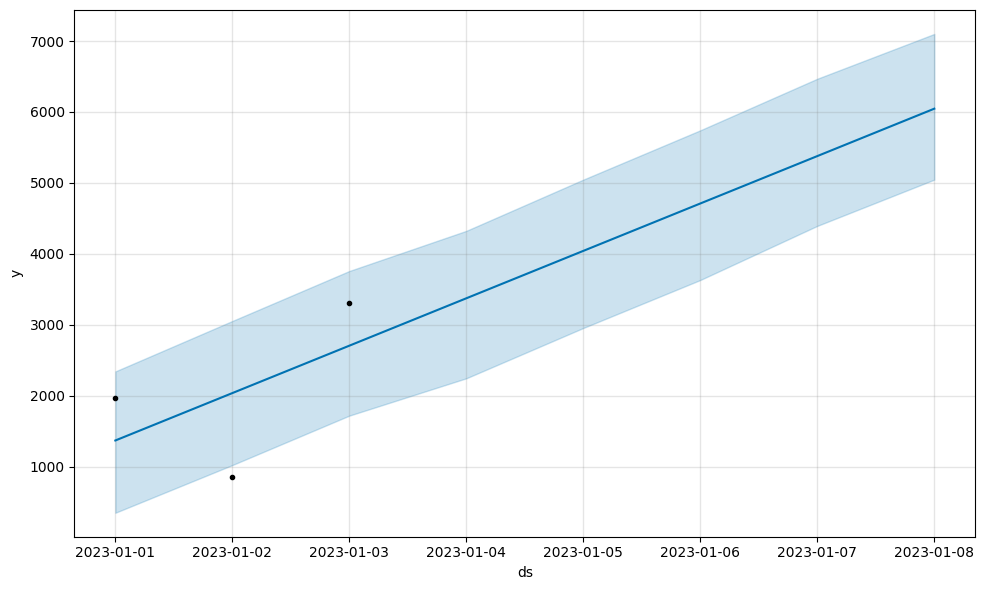

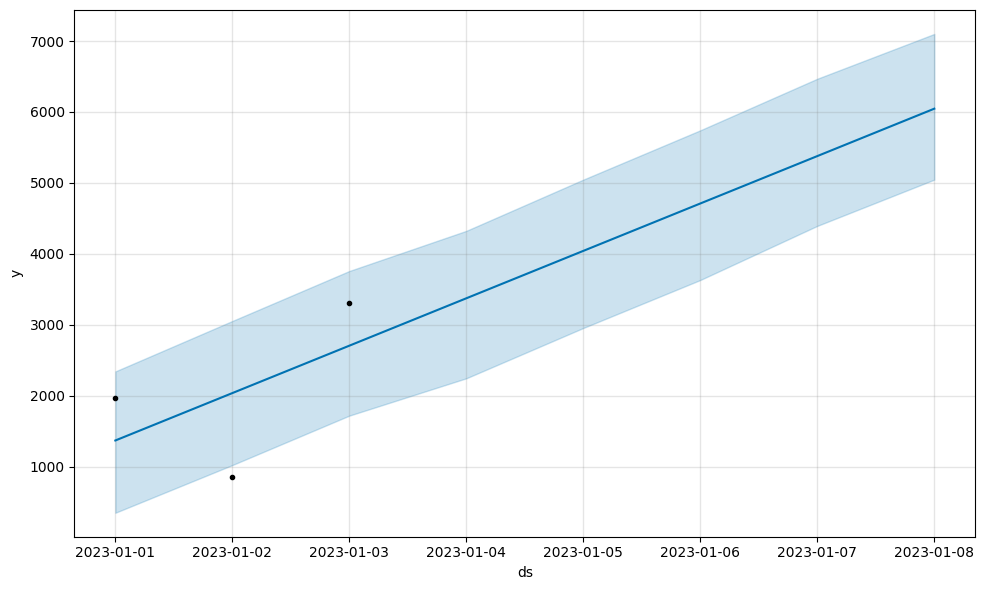

In [20]:
from prophet import Prophet
import pandas as pd

sales_data = d[['Campaign', 'Total Spent']].groupby('Campaign').sum().reset_index()
sales_data.rename(columns={'Campaign': 'ds', 'Total Spent': 'y'}, inplace=True)
sales_data['ds'] = pd.date_range(start='2023-01-01', periods=len(sales_data), freq='D')


sales_data.rename(columns={'Total Spent': 'y'}, inplace=True)

model = Prophet()
model.fit(sales_data)

future = model.make_future_dataframe(periods=5)
forecast = model.predict(future)

model.plot(forecast)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

X = d[['Age', 'Total Spent', 'Customer Tenure (Years)']]
y = d['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [-0.01796718  0.0005195  -0.02669989]
Model Intercept: 1.1396305572390506


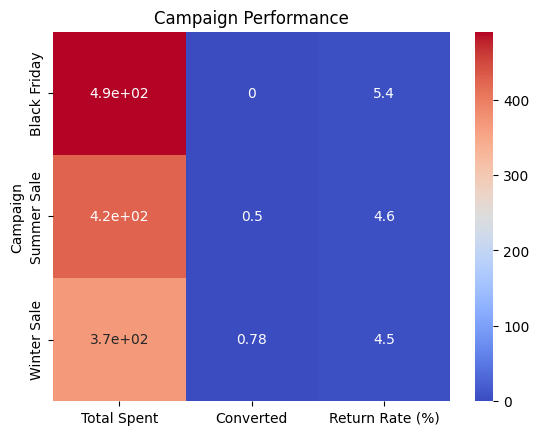

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = d.select_dtypes(include=np.number).columns
campaign_performance = d.groupby('Campaign')[numeric_cols].mean()
sns.heatmap(campaign_performance[['Total Spent', 'Converted', 'Return Rate (%)']], annot=True, cmap='coolwarm')
plt.title('Campaign Performance')
plt.show()

In [26]:
d['ROI'] = d['Total Spent'] / (d['Discount Availed'] + 1)
roi_by_region = d.groupby('Region')['ROI'].mean()

print(roi_by_region)

Region
East     41.185835
North    17.741597
South    10.273973
West     40.297215
Name: ROI, dtype: float64


In [28]:
from textblob import TextBlob


d['Polarity'] = d['Comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
d['Sentiment'] = d['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

print(d[['Comments', 'Sentiment']])


                           Comments Sentiment
0        Satisfied with the service  Positive
1     Needs improvement in delivery  Negative
2                  Regular customer  Negative
3                  Occasional buyer  Negative
4                      High spender  Positive
5                Average experience  Negative
6           Prefers online shopping  Negative
7                      New customer  Positive
8                Loyal to the brand  Positive
9              High conversion rate  Positive
10                   Low engagement  Negative
11   Satisfied with product quality  Positive
12                 Frequent shopper  Positive
13             Unhappy with returns  Negative
14                 Enjoys discounts  Negative
15               Enjoys the product  Negative
16           Needs more information  Positive
17  Satisfied with customer service  Positive
18                   Not interested  Negative
19                 Likes the design  Negative


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

features = pd.get_dummies(d[['Purchased Category']])
similarity = cosine_similarity(features)

customer_idx = 0
recommended = d.iloc[similarity[customer_idx].argsort()[-3:]]['Purchased Category']
print(f"Recommended Products: {recommended.values}")

Recommended Products: ['Clothing' 'Clothing' 'Clothing']


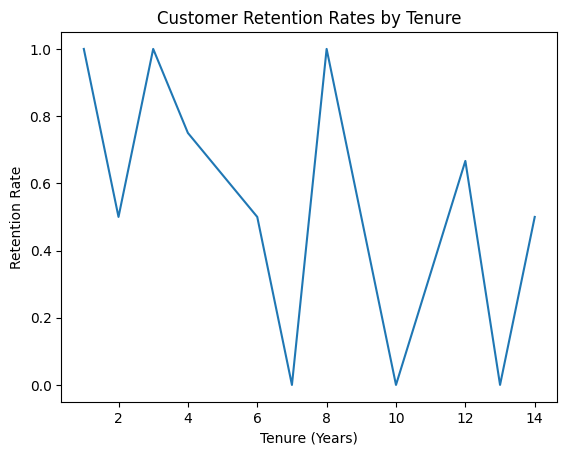

In [30]:
retention = d.groupby('Customer Tenure (Years)')['Converted'].mean()
plt.plot(retention)
plt.title('Customer Retention Rates by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Retention Rate')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

X = d['Comments'].str.len()
y = d['Converted']

model = Sequential([
    Embedding(input_dim=1000, output_dim=50, input_length=10),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=3, batch_size=10)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4000 - loss: 0.6932
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6000 - loss: 0.6911 
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6000 - loss: 0.6894 


In [32]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=42)
d['Anomaly'] = clf.fit_predict(d[['Total Spent', 'Discount Availed']])
anomalies = d[d['Anomaly'] == -1]

print(anomalies)

    Customer ID  Age Gender  Total Spent  Converted  \
0             1   23      F          150          1   
2             3   45      F          800          0   
7             8   27      M          120          1   
9            10   33      M          750          1   
10           11   40      F          610          1   
13           14   32      M          320          0   
16           17   42      F          550          0   
17           18   35      M          700          1   

                           Comments Purchased Category  Stock Region  \
0        Satisfied with the service           Clothing      4   East   
2                  Regular customer              Books     24  North   
7                      New customer         Home Goods      0  North   
9              High conversion rate           Clothing     45  South   
10                   Low engagement         Home Goods     68   East   
13             Unhappy with returns        Electronics     85   East   


In [34]:
conversion_data = d[['Campaign', 'Converted']].groupby('Campaign').sum()

In [36]:
d['CLV'] = d['Total Spent'] * d['Customer Tenure (Years)']
print(d[['Customer ID', 'CLV']])

    Customer ID   CLV
0             1   600
1             2  7200
2             3  9600
3             4  1400
4             5  3600
5             6  5850
6             7  5360
7             8   360
8             9  7000
9            10   750
10           11  2440
11           12   580
12           13  3200
13           14  1280
14           15  1020
15           16  4900
16           17  3300
17           18  4200
18           19  2500
19           20  1600


In [39]:
import pymc as pm
import pandas as pd
import numpy as np


with pm.Model() as model:

    prior = pm.Beta('conversion_rate', alpha=1, beta=1, shape=len(d))


    observed = pm.Binomial(
        'observed',
        n=d['Total Spent'].values,
        p=prior,
        observed=d['Converted'].values
    )


    trace = pm.sample(1000, return_inferencedata=False)


conversion_posterior = trace['conversion_rate']
for i, campaign in enumerate(d['Campaign']):
    print(f"{campaign}: Posterior mean conversion rate = {np.mean(conversion_posterior[:, i])}")


Output()

Output()

Winter Sale: Posterior mean conversion rate = 0.013531209725658359
Summer Sale: Posterior mean conversion rate = 0.0033277013625246975
Black Friday: Posterior mean conversion rate = 0.001218599101758904
Winter Sale: Posterior mean conversion rate = 0.004893387824828006
Winter Sale: Posterior mean conversion rate = 0.006681189451097434
nan: Posterior mean conversion rate = 0.0022550055219413396
Winter Sale: Posterior mean conversion rate = 0.002936796156226748
Winter Sale: Posterior mean conversion rate = 0.016795450082975862
Winter Sale: Posterior mean conversion rate = 0.002082559244085794
nan: Posterior mean conversion rate = 0.002685562299232033
Winter Sale: Posterior mean conversion rate = 0.003229590392868515
Black Friday: Posterior mean conversion rate = 0.0034427395293495167
nan: Posterior mean conversion rate = 0.0049423211868509734
Black Friday: Posterior mean conversion rate = 0.0030099893731872687
nan: Posterior mean conversion rate = 0.003925052798759241
Winter Sale: Poster